In [888]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as patches
import numpy as np
import scipy
from scipy.optimize import curve_fit
import cv2
from PIL import Image
import glob

import images_library

#DARK SCAN
Seleziono diverse ROI nelle immagini di buio e guardo se c'è un andamento temporale durante le misure

In [889]:
#Save results in two files: 
outputFile="buio2_11.txt"
outputFileReadable="buioR2_11.txt"

File: 20221102_Flash/2022_11_02_flash_1mm/pdd/buio_16.TIF
ROI - center X, Y: 0, 0
ROI - R, N of pixels: 0, 262144
Signal - (integral): 542737526
Signal - (mean): 2070
Signal - (stdev): 3


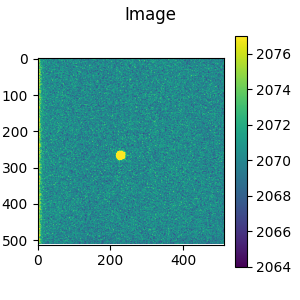

In [890]:
inputFile = "20221102_Flash/2022_11_02_flash_1mm/pdd/buio_16.TIF"
imArray=images_library.openImage(inputFile)
images_library.plotImage(imArray, title="Image")
images_library.checkSaturation(imArray)

cenX, cenY=0,0
r=0
pixelInROI= 512*512

signalIntegral = np.sum(imArray)
signalMean= np.mean(imArray)
signalStdev = np.std(imArray)

print("File: %s" % inputFile )
print("ROI - center X, Y: %d, %d" % (cenX, cenY) )
print("ROI - R, N of pixels: %d, %d" % (r, pixelInROI))
print("Signal - (integral): %d" % signalIntegral)
print("Signal - (mean): %d" % signalMean)
print("Signal - (stdev): %d" % signalStdev)


In [891]:
#Save info on a .txt file
#header = "#X, Y, R, signal, mean, stdev"
text_file = open(outputFile, "a")
text_file.write("%d\t%d\t%d\t%d\t%.2f\t%.2f\n" % (cenX, cenY, r, signalIntegral, signalMean, signalStdev))

29

In [892]:
#Save info on a .txt file in a more readable way
text_file = open(outputFileReadable, "a")
text_file.write("File: %s\n" % inputFile )
text_file.write("ROI - center X, Y: %d, %d\n" % (cenX, cenY) )
text_file.write("ROI - R, N of pixels: %d, %d\n" % (r, pixelInROI))
text_file.write("Signal - (integral): %d\n" % signalIntegral)
text_file.write("Signal - (mean): %d\n" % signalMean)
text_file.write("Signal - (stdev): %d\n\n" % signalStdev)
text_file.close()

File: 20221102_Flash/2022_11_02_flash_1mm/pdd/buio_16.TIF
ROI - center X, Y: 100, 100
ROI - R, N of pixels: 25, 1941
Signal - (integral): 4018181
Signal - (mean): 2070
Signal - (stdev): 3


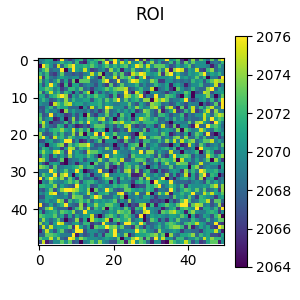

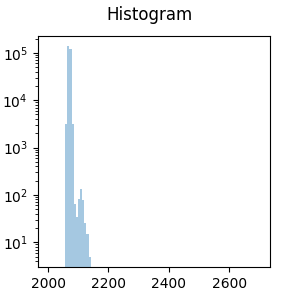

In [893]:
#Select a ROI 
cenX, cenY=100, 100
r = 25
x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]
ROI=images_library.defineROI(x, y, cenX, cenY, r)
images_library.plotImage(images_library.applySquareROI(imArray, cenX, cenY, r), title="ROI")
images_library.histImage(imArray, bins=np.linspace(2000, 2700, 100), title ="Histogram")

pixelInROI = len(ROI[ROI==True])
signalIntegral = np.sum(imArray[ROI])
signalMean = np.mean(imArray[ROI])
signalStdev = np.std(imArray[ROI])

print("File: %s" % inputFile )
print("ROI - center X, Y: %d, %d" % (cenX, cenY) )
print("ROI - R, N of pixels: %d, %d" % (r, pixelInROI))
print("Signal - (integral): %d" % signalIntegral)
print("Signal - (mean): %d" % signalMean)
print("Signal - (stdev): %d" % signalStdev)


In [894]:
#Save info on a .txt file
#header = "#X, Y, R, signal, mean, stdev"
text_file = open(outputFile, "a")
text_file.write("%d\t%d\t%d\t%d\t%.2f\t%.2f\n" % (cenX, cenY, r, signalIntegral, signalMean, signalStdev))

32

In [895]:
#Save info on a .txt file in a more readable way
text_file = open(outputFileReadable, "a")
text_file.write("File: %s\n" % inputFile )
text_file.write("ROI - center X, Y: %d, %d\n" % (cenX, cenY) )
text_file.write("ROI - R, N of pixels: %d, %d\n" % (r, pixelInROI))
text_file.write("Signal - (integral): %d\n" % signalIntegral)
text_file.write("Signal - (mean): %d\n" % signalMean)
text_file.write("Signal - (stdev): %d\n\n" % signalStdev)
text_file.close()

File: 20221102_Flash/2022_11_02_flash_1mm/pdd/buio_16.TIF
ROI - center X, Y: 400, 400
ROI - R, N of pixels: 25, 1941
Signal - (integral): 4018600
Signal - (mean): 2070
Signal - (stdev): 3


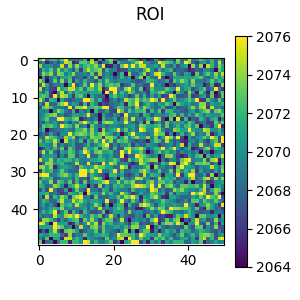

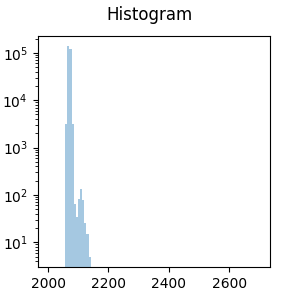

In [896]:
#Select a second ROI 
cenX, cenY=400, 400
r = 25
x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]
ROI=images_library.defineROI(x, y, cenX, cenY, r)
images_library.plotImage(images_library.applySquareROI(imArray, cenX, cenY, r), title="ROI")
images_library.histImage(imArray, bins=np.linspace(2000, 2700, 100), title ="Histogram")

pixelInROI = len(ROI[ROI==True])
signalIntegral = np.sum(imArray[ROI])
signalMean = np.mean(imArray[ROI])
signalStdev = np.std(imArray[ROI])

print("File: %s" % inputFile )
print("ROI - center X, Y: %d, %d" % (cenX, cenY) )
print("ROI - R, N of pixels: %d, %d" % (r, pixelInROI))
print("Signal - (integral): %d" % signalIntegral)
print("Signal - (mean): %d" % signalMean)
print("Signal - (stdev): %d" % signalStdev)


In [897]:
#Save info on a .txt file
#header = "#X, Y, R, signal, mean, stdev"
text_file = open(outputFile, "a")
text_file.write("%d\t%d\t%d\t%d\t%.2f\t%.2f\n" % (cenX, cenY, r, signalIntegral, signalMean, signalStdev))

32

In [898]:
#Save info on a .txt file in a more readable way
text_file = open(outputFileReadable, "a")
text_file.write("File: %s\n" % inputFile )
text_file.write("ROI - center X, Y: %d, %d\n" % (cenX, cenY) )
text_file.write("ROI - R, N of pixels: %d, %d\n" % (r, pixelInROI))
text_file.write("Signal - (integral): %d\n" % signalIntegral)
text_file.write("Signal - (mean): %d\n" % signalMean)
text_file.write("Signal - (stdev): %d\n\n" % signalStdev)
text_file.close()